# Image Analysis

This notebook aims to analyse data from different timestamps in grayscale.

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import csv
import pandas as pd
import glob
from skimage import data
from skimage.filters import threshold_multiotsu
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

In [3]:
from skimage import io

### Ostu Threshold

Greatly affected by artefact

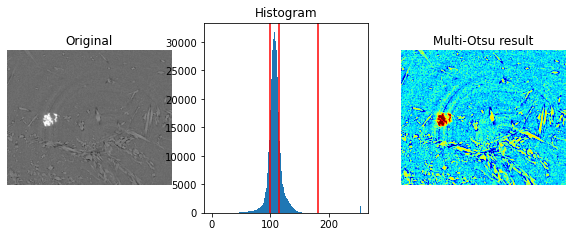

In [5]:
# The input image.
img = io.imread('VA10_Pc200_Ram25_Pf50_T125_0050\VA10_Pc200_Ram25_Pf50_T125_0050_0471.rec.8bit.tif')
image = img[353:1053, 282:1137] 

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

### Histogram

(array([   60.,    74.,    63.,   101.,   101.,    96.,   130.,   134.,
          111.,   151.,   141.,   165.,   187.,   206.,   210.,   230.,
          257.,   292.,   256.,   308.,   328.,   340.,   374.,   427.,
          470.,   485.,   507.,   587.,   635.,   715.,   766.,   852.,
          932.,   967.,  1121.,  1308.,  1524.,  1702.,  2002.,  2362.,
         2667.,  3295.,  4122.,  5129.,  6461.,  8142., 10309., 12817.,
        15797., 18928., 22057., 25798., 28901., 31561., 33135., 34290.,
        34165., 33306., 31156., 28770., 25264., 22349., 18870., 15767.,
        12828., 10631.,  8591.,  7102.,  5880.,  5128.,  4472.,  4002.,
         3809.,  3477.,  3270.,  3095.,  2946.,  2859.,  2585.,  2450.,
         2371.,  2183.,  1947.,  1713.,  1598.,  1334.,  1222.,  1037.,
          911.,   781.,   639.,   555.,   422.,   383.,   307.,   200.,
          179.,   142.,   138.,   163.]),
 array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62., 

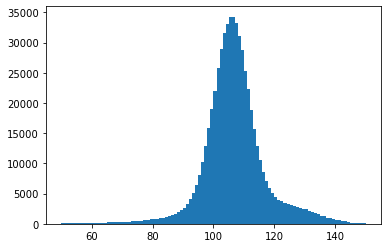

In [13]:
img_path = '.\VA10_Pc200_Ram25_Pf50_T125_0050\VA10_Pc200_Ram25_Pf50_T125_0050_1360.rec.8bit.tif'
img = cv2.imread(img_path, 0)[353:1053, 282:1137] 
plt.hist(img.ravel(), 100, [50, 150])

### ROI Shifting Problem

### Test 0040 y shifting

In [6]:
file_path_40 = os.path.join(os.getcwd(), 'VA10_Pc200_Ram25_Pf50_T125_0040\VA10_Pc200_Ram25_Pf50_T125_0040_0535.rec.8bit.tif')
file_path_50 = os.path.join(os.getcwd(), 'VA10_Pc200_Ram25_Pf50_T125_0050\VA10_Pc200_Ram25_Pf50_T125_0050_0600.rec.8bit.tif')

# img_40 = cv2.imread(file_path_40)[389:1089, 279:1134] #[403:1103, 279:1134] y-axis minus 14
# img_50 = cv2.imread(file_path_50)[353:1053, 282:1137]

y1,y2,x1,x2 = 500, 850, 290, 600
img_40 = cv2.imread(file_path_40)[y1+36:y2+36, x1-3:x2-3] #[403:1103, 279:1134] y-axis minus 14
img_50 = cv2.imread(file_path_50)[y1:y2, x1:x2]

cv2.imwrite('mask_test/t0040_0535_crop_test.png', img_40)
cv2.imwrite('mask_test/t0050_0600_crop_test.png', img_50)

True

In [41]:
file_path_40 = os.path.join(os.getcwd(), 'VA10_Pc200_Ram25_Pf50_T125_0040\VA10_Pc200_Ram25_Pf50_T125_0040_0535.rec.8bit.tif')
im40 = cv2.imread(file_path_40, -1)
height, width = im40.shape
mask = np.zeros((height, width), np.uint8)  
cv2.rectangle(mask, (279, 389), (1133, 1088), 1, -1)  #40
# cv2.rectangle(mask, (282, 353), (1136, 1052), 1, -1)  # 50

# # get 40 from 50
# [389:1089, 279:1134] # 40
# [353:1053, 282:1137] # 50
# [y1:y2, x1:x2]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
mask.nonzero()


(array([ 389,  389,  389, ..., 1088, 1088, 1088], dtype=int64),
 array([ 279,  280,  281, ..., 1131, 1132, 1133], dtype=int64))

### Centroids Feature Visualisation

In [8]:
import cv2
import os
import random
import numpy as np
import module.features as features
import module.content as content

In [2]:
begin_timestamp = '0050'
end_timestamp = '0050'
begin_slice = 600
end_slice = 800
filename_3D = "dummy_3d"
filename_4D = "training_data_4D_3x3_0050"
size = 3

In [3]:
subsampling_rate = 0.018
# for locate target folder
keyword = 'VA10_Pc200_Ram25_Pf'

current_path = os.getcwd()
all_timestamp = content.get_folder(current_path, keyword)
# get the index for begin and end
begin_timestamp_index = [all_timestamp.index(i) for i in all_timestamp if begin_timestamp in i]
end_timestamp_index = [all_timestamp.index(i) for i in all_timestamp if end_timestamp in i]
# create target timestamp list
target_timestamp = all_timestamp[begin_timestamp_index[0]: end_timestamp_index[0]+1]


In [14]:
all_feature_4D = []

for sub_timestamp in target_timestamp:
	sub_path = os.path.join(current_path, sub_timestamp)
	print('Current timestamp:', sub_path)
	sub_all_tif = content.get_allslice(sub_path)
	target_slice = sub_all_tif[begin_slice-1: end_slice]

	# use feature_index to get the features
	_, feature_index = features.get_rec_mask_50(sub_all_tif[0], size)
	total_feature_num = len(feature_index)
	sample_feature_num = int(subsampling_rate * total_feature_num)
	sample_list = random.sample(range(total_feature_num), sample_feature_num)
	# get the sample index
	sub_feature_index = [feature_index[i] for i in sample_list]
	
	# for each_tif in target_slice:
	# 	if size == 3:
	# 		feature_4D, feature_3D = features.get_all_features_3(each_tif, sub_feature_index, keyword)
	# 	elif size == 1:
	# 		feature_4D, feature_3D = features.get_all_features_1(each_tif, sub_feature_index, keyword)
	# 	elif size == 5:
	# 		feature_4D, feature_3D = features.get_all_features_5(each_tif, sub_feature_index, keyword)
	# 	else:
	# 		raise ValueError('Please set the right size type!')

# 		all_feature_4D.append(feature_4D)
# 		all_feature_3D.append(feature_3D)

# print('Collected the data!')

Current timestamp: d:\MSc-Project\VA10_Pc200_Ram25_Pf50_T125_0050
Pick one slice to get mask and features index
